<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/FORCASTING-ALGOS/blob/main/Complete_Guide__Forcasting%5BARIMA%2C_SURIMAX%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import warnings
import time
# !pip install pandas statsmodels matplotlib


In [2]:
path = "/content/berent_oil_price.csv"
data= pd.read_csv(path)
df = data.copy()
data.sample(5)

,date,price(USD)
1076,2018-02-21,64.81
917,2017-07-10,46.88
335,2015-04-08,56.42
2212,2022-08-15,98.25
474,2015-10-21,47.85


In [3]:
data.columns

Index(['date', 'price(USD)'], dtype='object')

In [4]:
# renameing column:
data.rename(columns={'price(USD)': 'price'}, inplace=True)

# iterating over rows and converting the string prce to flaot
for index, row in data.iterrows():
    if pd.notnull(row["price"]):  # Check if 'Date' is not null
        row["price"] = float(row["price"])
    else:
        pass

# convert from string to datetime
timesteps = []
for i in data.date:
    datetime_obj = (datetime.strptime(i,"%Y-%m-%d"))
    date_only = datetime_obj.date()
    timesteps.append(date_only)

# copy timesteps into data datfemae in column date
data.date = timesteps.copy()
data.sample(4)

,date,price
1743,2020-10-08,42.00
816,2017-02-16,55.65
2304,2022-12-23,82.45
1906,2021-06-02,70.60


In [5]:
# Set column 'date' as the index
data.set_index('date', inplace=True)

### checking the null values
print(f"\n null values:\n {data.isnull().sum()}\n")

## checking the sample:
print(f"\ndata_shape\n: {data.shape}\n")

## checking duplicated values:
print(f"duplicated values: {data.duplicated().sum()}\n")


 null values:
 price    21
dtype: int64


data_shape
: (2563, 1)

duplicated values: 444



In [6]:
# droping the null values
data.dropna(inplace=True)
# checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2542 entries, 2013-12-10 to 2023-12-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2542 non-null   float64
dtypes: float64(1)
memory usage: 39.7+ KB


In [7]:
data.sample(5)

,price
date,
2020-07-09,42.35
2022-07-06,108.54
2018-04-06,66.51
2017-10-20,57.75
2020-07-10,43.27


In [8]:
import plotly.express as px

# Assuming 'data' is your DataFrame with an index and a 'price' column

# Create a scatter plot
fig = px.scatter(data, x=data.index, y='price', hover_data = 'price')

# Customize the layout
fig.update_layout(title='DAILY PRICE',
                  xaxis_title='DAY',
                  yaxis_title='PETROL PRICE (USD)')

# Show the plot
fig.show()


The code you provided is using the autocorrelation_plot function from the pandas.

plotting module to create an autocorrelation plot for a time time series and a lagged version of itself.

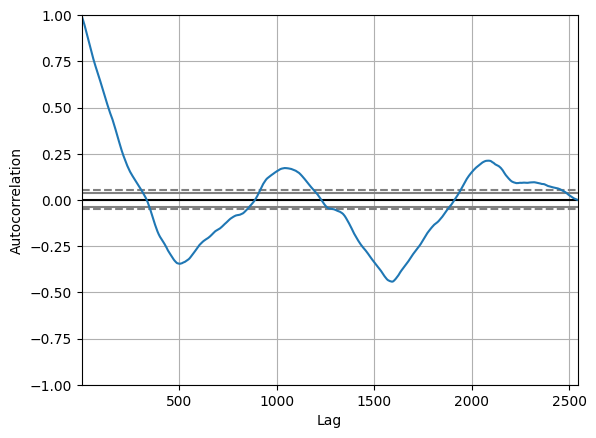

In [9]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data.stack())
plt.show()

## Here's an interpretation based on plot:

- Decrease to -0.35 at Lag 500: This suggests a negative autocorrelation at a lag of 500. **Negative autocorrelation indicates an inverse relationship between values at the current time point and those at the lag**.

- Peak till 0.20 at Lag 1000: The positive peak at lag 1100 indicates a positive autocorrelation. **This could imply a repeating pattern or cycle every 1000 time points.**

- Drop to -0.35 til Lag 1600: The subsequent drop to negative values at lags beyond 1000 and down to -0.35 suggests a changing pattern or a decrease in autocorrelation.

- Peak at 0.25 at Lag 2200: Another positive peak at lag 2200 suggests a potential repeating pattern or cycle every 2200 time points.
---

# ARIMA with Python

#### Autoregressive Integrated Moving Average (ARIMA) models are useful for time series forecasting when there is a clear trend and seasonality in the data.


**Here are some situations where ARIMA models can be appropriate:**

1. **Stationarity:** ARIMA models assume that the time series is stationary, meaning that its statistical properties, such as mean and variance, do not change over time. If your time series exhibits a trend or seasonality, you might need to difference the series to achieve stationarity.

2. **Trend and Seasonality:** ARIMA models are effective when there is a noticeable trend or seasonality in the data. If your time series data shows a consistent pattern that repeats over time, ARIMA may be a good choice.

3. **Univariate Time Series:** ARIMA is designed for univariate time series analysis, where you have one variable changing over time. If you have multiple related time series or other types of data, other models like VAR (Vector Autoregression) or machine learning models may be more appropriate.

4. **Short to Medium-Term Forecasting:** ARIMA models are generally suitable for short to medium-term forecasting. They may not perform as well for long-term forecasting or when the underlying dynamics of the time series change significantly.

5. **Minimal External Factors:** ARIMA models focus on the time series data itself and do not consider external factors (exogenous variables). If our forecasting problem involves multiple variables or external factors, other models like SARIMA (Seasonal ARIMA) or machine learning models with exogenous variables may be more suitable.

6. **Interpretable Results:** ARIMA models provide coefficients that can be interpreted to understand the impact of past observations on future values. If interpretability is important, ARIMA might be a good choice.




- Model Definition: Initialize the ARIMA model by invoking ARIMA() and specifying the p, d, and q parameters.

- Model Training: Train the model on your dataset using the fit() method.

- Making Predictions: Generate forecasts by utilizing the predict() function and designating the desired time index or indices.

---
---
# The Augmented Dickey-Fuller (ADF) test:
- It is a statistical test used to determine whether a unit root is present in a time series dataset.

- A unit root is an indicator of non-stationarity, meaning that the series does not have a constant mean and variance over time.

- The ADF test helps in assessing whether differencing the series can make it stationary.

# Key concepts related to the ADF test:

- Null Hypothesis (H0): The null hypothesis of the ADF test is that the time series has a unit root, indicating it is non-stationary.

- Alternative Hypothesis (H1): The alternative hypothesis suggests that the time series is stationary after differencing.

- Test Statistic: The ADF test produces a test statistic, and the critical values of the test statistic are used to determine whether to reject the null hypothesis.

- P-value: The test also provides a p-value. If the p-value is below a chosen significance level (e.g., 0.05), you reject the null hypothesis.

- Decision Rule: If the test statistic is less than the critical values (and the p-value is below the significance level), you reject the null hypothesis in favor of stationarity.

- Differencing: Depending on the order of differencing required to achieve stationarity, the number of differences needed can be an indication of the order of differencing (d) in the ARIMA model.

In [10]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(data.price, autolag = 'AIC')

print("1. ADF :",test[0])
print("2. P-Value : ", test[1])
print("3. Num Of Lags : ", test[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", test[3])
print("5. Critical Values :")


for key, val in test[4].items():
  print("\t",key, ": ", val)
print("\n")

# Check for stationarity based on the p-value
p_value = test[1]
print(round(p_value,3))
if p_value <= 0.05:
    print('Reject the null hypothesis; the data is stationary.')
else:
    print('Fail to reject the null hypothesis; the data is non-stationary.')


1. ADF : -2.488759397690157
2. P-Value :  0.11823329467564447
3. Num Of Lags :  18
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2523
5. Critical Values :
	 1% :  -3.432944516713937
	 5% :  -2.8626862482960957
	 10% :  -2.567380191580307


0.118
Fail to reject the null hypothesis; the data is non-stationary.


In [11]:
data.sample()

,price
date,
2014-05-08,108.19


---
**In the ARIMA model, we have to consider three parameters: (p, d, q)**

- P = lags in the autoregressive model.
- D = differencing / integration order.
- Q =  moving average lags.

---
## **The rolling mean**
- Rolling mean is a statistical calculation used in time series analysis to smooth out short-term fluctuations and highlight long-term trends or cycles in the data.

- It involves computing the mean of a subset of data points within a moving window as it slides or rolls through the dataset. The rolling mean is also known as the moving average.


**key steps to calculate the rolling mean:**

1. Define a Window Size: Choose a window size or the number of data points to include in each calculation of the mean. A larger window size will result in a smoother curve, but it may overlook short-term fluctuations.

2. Place the Window: Start at the beginning of the time series and place the window over the initial set of data points.

3. Calculate the Mean: Compute the mean of the data points within the window.

4. Move the Window: Shift the window by one data point and recalculate the mean.

5. Repeat: Continue this process until the window reaches the end of the time series.
---
The rolling mean is useful for identifying trends, cycles, and patterns in time series data. It helps remove noise and provides a clearer view of underlying patterns.

In [12]:
# Setting the window size for a 7-day rolling mean
window_size = 7

# Calculate the rolling mean
rolling_mean = data.rolling(window=window_size).mean()

rolling_mean_diff = rolling_mean - rolling_mean.shift()

- **The rolling mean difference** is a transformation applied to a time series by computing the difference between the original values and their corresponding rolling mean values.

- This transformation helps remove trends or patterns present in the data, leaving behind the fluctuations or residuals.


- The rolling mean difference is used in time series analysis to help identify and understand patterns, trends, and seasonality in the data.

- we can consider using the rolling mean difference:
  - Trend Removal:
  - Seasonal Adjustment:
  - Smoothing:
  - Identifying Anomalies:
  - Data Exploration:
  - Stationarity Check:

---



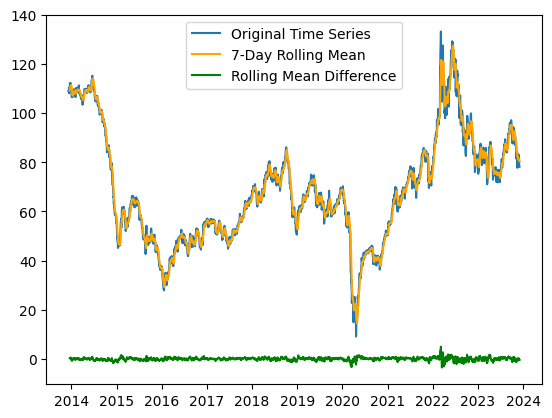

In [13]:

# Plot the original time series, rolling mean, and rolling mean difference
plt.plot(data, label='Original Time Series')
plt.plot(rolling_mean, label=f'{window_size}-Day Rolling Mean', color='orange')
plt.plot(rolling_mean_diff, label='Rolling Mean Difference', color='green')
plt.legend()
plt.show()

In [14]:
time_series_trend_dict = {"origial price" : data.price,
                     "Rolling mean" : rolling_mean.price,
                     "rolling_mean_diff" : rolling_mean_diff.price}

time_series_trend = pd.DataFrame(time_series_trend_dict)

time_series_trend.head(30)

,origial price,Rolling mean,rolling_mean_diff
date,,,
2013-12-10,108.91,NaN,NaN
2013-12-11,109.47,NaN,NaN
2013-12-12,108.99,NaN,NaN
2013-12-13,108.08,NaN,NaN
2013-12-16,110.30,NaN,NaN
2013-12-17,108.91,NaN,NaN
2013-12-18,109.56,109.174286,NaN
2013-12-19,110.78,109.441429,0.267143
2013-12-20,112.15,109.824286,0.382857


In [15]:
diff_test = adfuller(time_series_trend['rolling_mean_diff'].dropna(), autolag = 'AIC')

test_statistic, p_value, _, _, _, _ = diff_test
print(f'1. Test Statistic: {test_statistic}')
print(f'2. P-value: {p_value}')

1. Test Statistic: -8.810808410301783
2. P-value: 1.9937479197480016e-14


---
We can see that the p-value still not not less than 0.05.

now, our time series still not stationary.


NOTE: Even if the p value become near less the null hypothesis we can use ARIMA model but then the result will also exhibits a trend without seasonality ,So to get rid of the situation, we can use the SARIMAX model.

---
##SARIMAX Model:

SARIMAX stands for Seasonal AutoRegressive Integrated Moving Average with eXogenous factors.


In SARIMAX, the "S" stands for seasonality, and "eXogenous" factors refer to external variables that can be included in the model.


SARIMAX is an extension of the ARIMA (AutoRegressive Integrated Moving Average) model, which is a popular time series forecasting model.

---

#### NOTE:
if your time series is influenced by external factors beyond its own historical values (exogenous variables), SARIMAX can capture these influences more effectively.

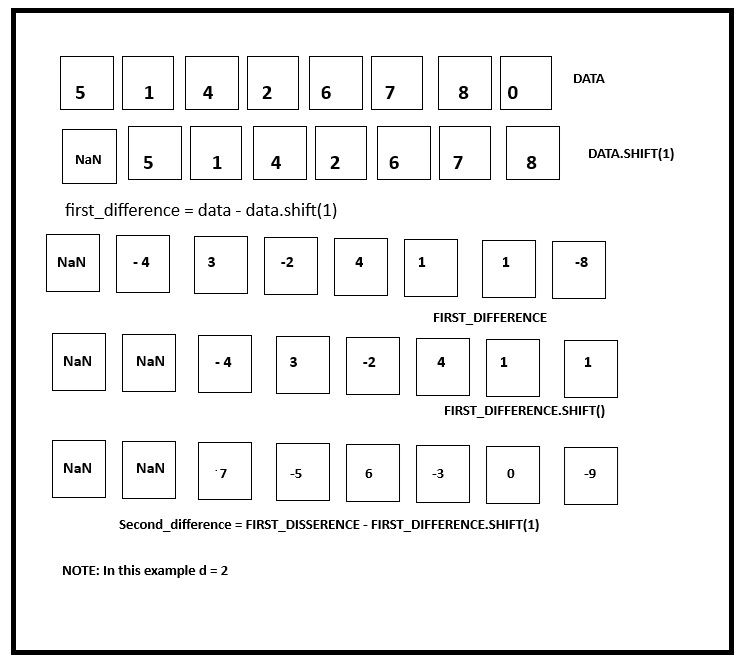

Similarly through ACF plot we can determine q and through PACF we can determine p

## NOTE
---
Definition:

AFC|PAFC
-------------------|-------------------------
**ACF (Autocorrelation Function)**| **PACF (Partial Autocorrelation Function)**
**It measures the correlation between a time series and its lagged values, taking into account all the intermediate lags.**|**It measures the correlation between a time series and its lagged values, excluding the contributions from intermediate lags.**|
**It provides a complete picture of how each lagged observation is correlated with the current observation.**|**It gives the direct correlation between a specific lag and the current observation, removing the effects of shorter lags**

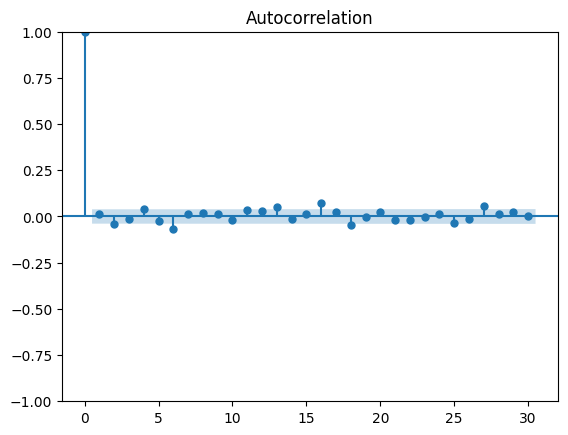

In [16]:
df = data.price.copy()

# Calculate the first difference (d=1)
price_diff = df.diff().dropna()


# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(price_diff, lags=30)
plt.show()

In an autocorrelation function (ACF) plot:

- The blue shaded region represents the confidence interval or bounds.
- The bars or lines outside the blue shaded region are the autocorrelation values at different lags.

If a bar (**autocorrelation value**) crosses the upper or lower bounds of the blue shaded region, it indicates that the autocorrelation at that specific lag is statistically significant.

The shaded region helps you determine whether the observed autocorrelation values are statistically significant or just due to random noise.

In summary, points (bars) outside the blue shaded region are considered statistically significant, while those inside the region are not necessarily indicating non-correlation. It's more about distinguishing between significant and non-significant autocorrelation values.

<Figure size 1200x600 with 0 Axes>

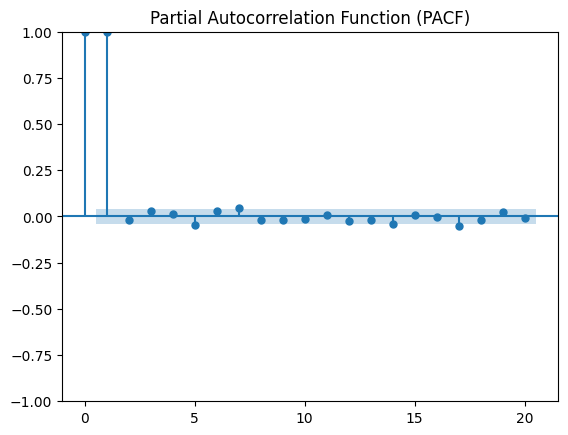

In [17]:
#Plot the Partial Autocorrelation Function (PACF) for value p
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 6))
plot_pacf(data['price'], lags=20, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

- p (AutoRegressive order): This parameter represents the number of autoregressive terms, i.e., the number of lag observations included in the model. It indicates how many past time points are used to predict the current value. For example, if p=2, the model uses the two most recent observations to predict the current one.

- d (Integrated order): This parameter represents the degree of differencing. Differencing is performed to make the time series stationary, which means removing trends or seasonality. If d=1, it implies that the first difference (the difference between consecutive observations) is taken to achieve stationarity.

- q (Moving Average order): This parameter represents the number of lagged forecast errors included in the model. It indicates how many past forecast errors are used to predict the current value. If q=1, the model includes the most recent forecast error in the prediction.

---
---

- **In a SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables)** model, the term "seasonal order" refers to the seasonal component of the model.

- This component is added to the non-seasonal ARIMA (Autoregressive Integrated Moving Average) model to account for repeating patterns or seasonality in the time series data.

**The seasonal order is represented by the tuple (P, D, Q, s), where:**

1. P (Seasonal Autoregressive Order): This parameter represents the number of autoregressive lags at the seasonal frequency. It indicates how many past observations at the seasonal frequency are used to predict the current value.

2. D (Seasonal Difference Order): This parameter represents the number of differences taken at the seasonal frequency. It indicates how many times the series is differenced at the seasonal frequency to make it stationary.

3. Q (Seasonal Moving Average Order): This parameter represents the number of lagged forecast errors at the seasonal frequency. It indicates how many past forecast errors at the seasonal frequency are used to predict the current value.

4. s (Seasonal Period): This parameter represents the length of the seasonal cycle (window size).

In summary:

- P: Autoregressive order at the seasonal frequency.
- D: Order of seasonal differencing.
- Q: Moving average order at the seasonal frequency.
- s: Window size.

For example, if you have daily data with a weekly seasonality, you might use a seasonal order of (0, 1, 1, 7), where:

- P = 0 (no autoregressive terms at the weekly frequency),
- D = 1 (one difference to make the series stationary),
- Q = 1 (one moving average term at the weekly frequency),
- s = 7 (weekly seasonality).

In [18]:
import statsmodels.api as sm

In [19]:
data.sample()

,price
date,
2023-11-06,87.31


In [20]:
model=sm.tsa.statespace.SARIMAX(data,order=(1, 1, 1),seasonal_order=(1,1,1,7))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [21]:
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             price   No. Observations:                 2542
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -4851.143
Date:                           Sun, 10 Dec 2023   AIC                           9712.286
Time:                                   15:03:26   BIC                           9741.474
Sample:                                        0   HQIC                          9722.875
                                          - 2542                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3765      0.390     -0.966      0.334      -1.141       0.387
ma.L1          0.4014      0.386      1.039

# Making Predictions:

In [22]:
def predict_function(forcast_steps):
    # Specify the number of steps to forecast
    FORCAST_STEPS = forcast_steps
    PERIODS = FORCAST_STEPS + 1

    # Suppress ValueWarning and FutureWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category = UserWarning)
        warnings.simplefilter("ignore", category = FutureWarning)

        # Measure execution time
        start_time = time.time()

        # making prediction:
        forecast = results.get_forecast(steps=7)

        # Measure execution time
        execution_time = time.time() - start_time

    # Access the predicted values
    predicted_values = forecast.predicted_mean

    # Get the last date in the DataFrame
    last_date = data.index[-1]


    # Generate a new DataFrame with the dates for the next 7 steps
    new_dates = pd.date_range(start=last_date, periods=PERIODS, freq='D')[1:]  # Exclude the last_date

    # Print or use the predicted values
    predict_frame = pd.DataFrame({"date": new_dates, "predicted_values": predicted_values,})

    return predict_frame, execution_time

In [23]:
prediction_table, execution_time = predict_function(forcast_steps=7)
prediction_table

,date,predicted_values
2542,2023-12-05,78.195446
2543,2023-12-06,78.184150
2544,2023-12-07,78.237638
2545,2023-12-08,78.203450
2546,2023-12-09,78.259443
2547,2023-12-10,78.145049
2548,2023-12-11,78.047711


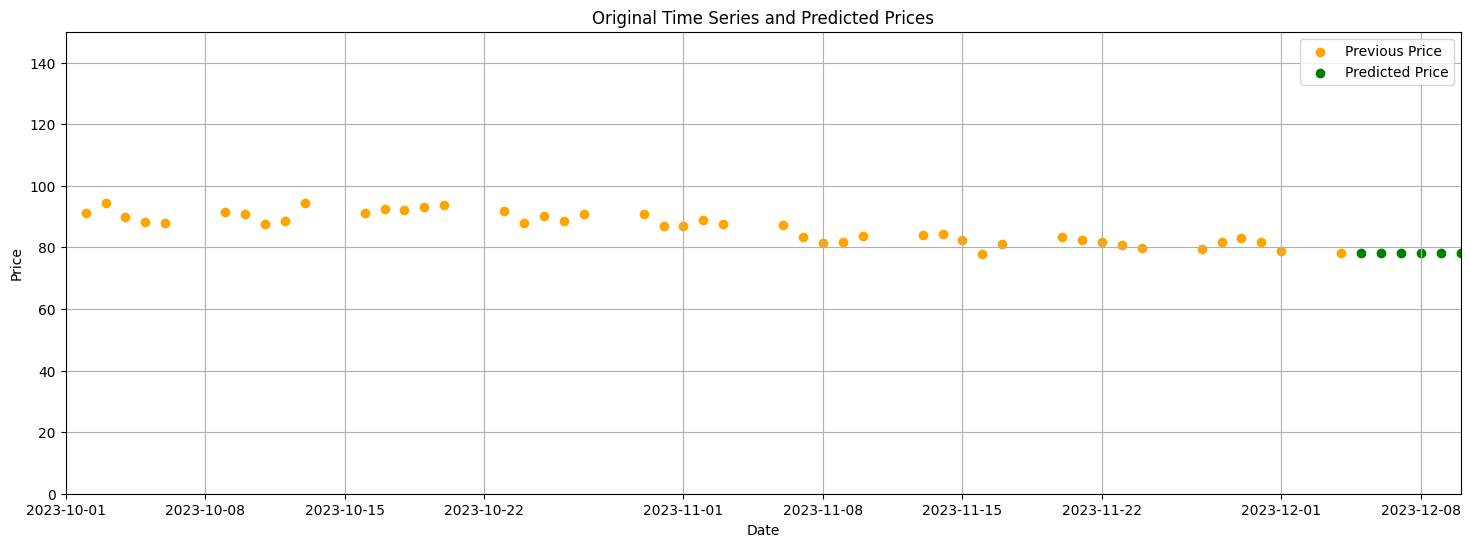

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))  # Adjust the size as needed

# Plot the original time series, previous price, and predicted price
plt.scatter(data.index, data["price"], label='Previous Price', color='orange', marker='o')
plt.scatter(prediction_table.date, prediction_table["predicted_values"], label='Predicted Price', color='green', marker='o')

# Customize the plot
plt.title('Original Time Series and Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)


# Set x-axis and y-axis limits for zooming in
plt.xlim(pd.Timestamp('2023-10-01'), pd.Timestamp('2023-12-10'))  # Adjust the date range as needed
plt.ylim(00, 150)  # Adjust the price range as needed

plt.show()
plt.show()


# metric:

MSE = (y_actual-y_pred)<sup>2</sup>


MSE = MSE/n

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Evaluate prediction performance
actual_values = []
for k in data['price']:
    k=round(k,3)
    actual_values.append(k)

predicted_value = results.predict(start=1, end=2542, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [67]:
predicted_values = []
for pv in predicted_value:
    pv = round(pv,3)
    predicted_values.append(pv)


def mean_square_error():
    square_difference = []
    Absolute_Difference = []

    for v in range(len(actual_values)):
        difference = actual_values[v] - predicted_values[v]
        Absolute_Diff = abs(difference)
        sq_diff = (difference)**2

        square_difference.append(sq_diff)
        Absolute_Difference.append(Absolute_Diff)

    total = sum(square_difference)
    total_abs = sum(Absolute_Difference)

    MSE = round(total/(len(square_difference)),2)
    MAE = round(total_abs/(len(square_difference)),2)
    RMSE = math.sqrt(MSE)
    return {"Mean_square_error":MSE, "Root_mean_aquare_error":round(RMSE), "Mean_Abs_error": MAE}

mean_square_error()







{'Mean_square_error': 1.187134248229736,
 'Root_mean_aquare_error': 1.089556904539518,
 'Mean_Abs_error': 0.11469669551534255}